In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader import data as wb
%matplotlib inline

In [3]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata= pd.DataFrame()
for i in tickers:
    mydata[i] = wb.DataReader(i, data_source='yahoo', start='1995-1-1', end='2017-3-23')['Close']

In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,15.59375,3.761719,10.173052,8.173077
1995-01-04,15.46875,3.789062,10.446766,8.173077
1995-01-05,15.25000,3.726562,10.355528,8.193109
1995-01-06,15.28125,3.789062,10.355528,8.153045
1995-01-09,15.21875,3.765625,10.538004,8.072917


In [5]:
dados =   mydata/mydata.iloc[0]*100

In [6]:
dados.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,100.000000,100.000000,100.00000,100.000000
1995-01-04,99.198397,100.726895,102.69058,100.000000
1995-01-05,97.795591,99.065421,101.79372,100.245097
1995-01-06,97.995992,100.726895,101.79372,99.754903
1995-01-09,97.595190,100.103842,103.58744,98.774517


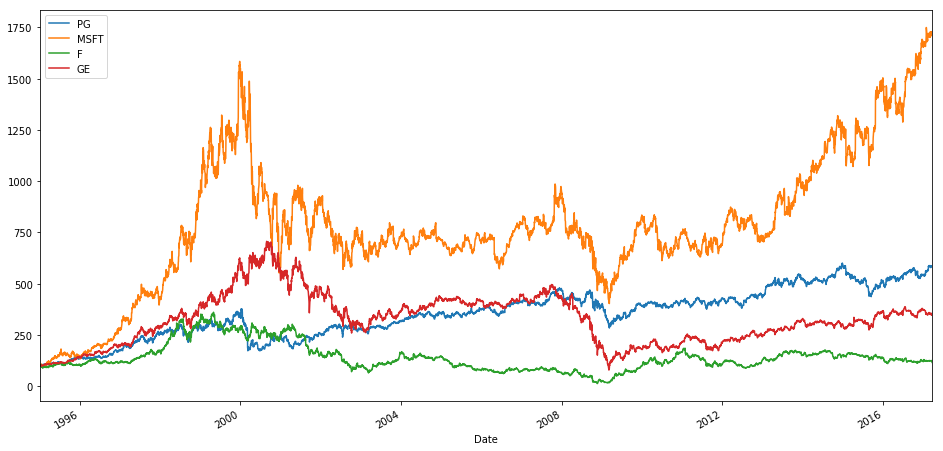

In [9]:
dados.plot(figsize=(16,8));

In [10]:
retorno_logaritmo = np.log(dados/dados.shift(1))

In [11]:
retorno_logaritmo.mean()*250

PG      0.078707
MSFT    0.127235
F       0.006134
GE      0.055781
dtype: float64

In [12]:
retorno_logaritmo.cov()*250

,PG,MSFT,F,GE
PG,0.052879,0.017102,0.020953,0.024849
MSFT,0.017102,0.102446,0.042891,0.040982
F,0.020953,0.042891,0.164473,0.051566
GE,0.024849,0.040982,0.051566,0.085983


In [13]:
retorno_logaritmo.corr()

,PG,MSFT,F,GE
PG,1.000000,0.232355,0.224679,0.368517
MSFT,0.232355,1.000000,0.330425,0.436657
F,0.224679,0.330425,1.000000,0.433623
GE,0.368517,0.436657,0.433623,1.000000


In [14]:
numero_ativos = len(tickers)

In [15]:
numero_ativos

4

In [16]:
pesos = np.random.random(numero_ativos)
pesos /= np.sum(pesos)
pesos

array([0.5183505 , 0.16272848, 0.30278538, 0.01613564])

# Retorno Esperado

In [18]:
np.sum(pesos*retorno_logaritmo.mean())*250

0.06425975924777022

# Variancia 

In [21]:
np.dot(pesos.T, np.dot(retorno_logaritmo.cov()*250, pesos))

0.04684546167405616

# Volatilidade

In [22]:
np.sqrt(np.dot(pesos.T, np.dot(retorno_logaritmo.cov()*250, pesos)))

0.21643812435441256